## Week 5: Introduction to neural Networks

In [ ]:
Solutions

### Perceptron learning rule

This week, we will start working with neural networks. For each of the exercises below you can use the method of your choice but you should display the final boundary of your classifier.

#### Exercise 1. 
As a first exercise, load the binary dataset below and code a few steps of the perceptron learning rule. 

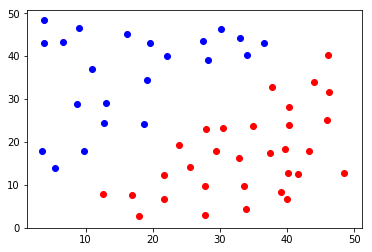

 2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [208]:
import scipy.io as sio
data1 = sio.loadmat('perceptron_data_class1.mat')
data2 = sio.loadmat('perceptron_data_class2.mat')

from numpy import linalg as LA

data1 = data1['perceptron_data_class1']
data2 = data2['perceptron_data_class2']

# put your code here

sz1 = np.shape(data1)
sz2 = np.shape(data2)

targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

total_targets = np.hstack((targetsClass1, targetsClass2))
total_data = np.vstack((data1, data2))


max_iter = 100

sigma = 1
beta = np.random.normal(0, 1, (2,))
beta0 = np.random.normal(0, 1, 1)


eta = .1
iter_num = 1



plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')



#while any(condition_tmp<0):
while iter_num < 100:
    
    
    condition_tmp = np.multiply(np.dot(beta,total_data.T) + beta0,total_targets) 
    out_tmp = np.vstack((condition_tmp, condition_tmp))
    out_tmp = out_tmp.T
    
    target_tmp = np.vstack((total_targets, total_targets))
    
    gradient_beta = np.multiply(target_tmp.T,total_data)
    gradient_beta = gradient_beta[condition_tmp<0, :]
    gradient_beta = np.sum(gradient_beta, axis=0)

    gradient_beta0 = np.sum(total_targets[condition_tmp<0], axis = 0)
    gradient = np.hstack((gradient_beta, gradient_beta0))
    gradient = gradient/LA.norm(gradient)
    
    betaTotal = np.hstack((beta, beta0))
    
    betaTotal = betaTotal + eta*gradient
    
    iter_num +=1
    print(iter_num)
    
    
    
    
 

#### Exercise 2.

__2a.__ Load the data below. Using the neural_network module from scikit-learn and its MLPClassifier model, learn a classifier, for the dataset below using 

- One hidden layer with a linear activation function and 
    - One neuron
    - Two neurons
    
    
    
- One hidden layer with a non linear activation function (take Relu for example or a binary step)
    - One neuron
    - Two neurons

How many neurons, hidden layers do you need to learn the distribution of the data? Do you have an idea why?

Try increasing the number of neurons and hidden layers. Then try different values of the learning rate. 


172
195
(172,)
(195,)
(367,)


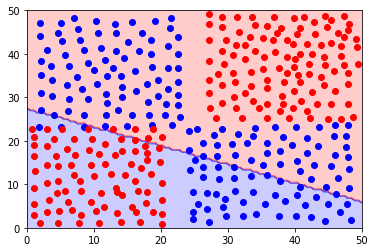

In [160]:
## 1) This is the solution for the one neuron exercise



import scipy.io as sio
data1 = sio.loadmat('neural_net_class1.mat')
data2 = sio.loadmat('neural_net_class2.mat')

data1 = data1['neural_net_class1']
data2 = data2['neural_net_class2']

from sklearn.neural_network import MLPClassifier

# put your code here

import matplotlib.pyplot as plt
import numpy as np


sz1 = np.shape(data1)
print(sz1[0])
sz2 = np.shape(data2)
print(sz2[0])


targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

print(np.shape(targetsClass1))
print(np.shape(targetsClass2))


total_targets = np.hstack((targetsClass1, targetsClass2))

print(np.shape(total_targets))

total_data = np.vstack((data1, data2))

from sklearn.neural_network import MLPClassifier

my_classifier = MLPClassifier(hidden_layer_sizes = 1, activation = 'identity')

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()



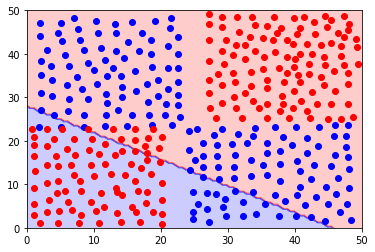

In [161]:

## 2) Now adding a couple of neurons


my_classifier = MLPClassifier(hidden_layer_sizes = (20,20,20), activation = 'identity')

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()


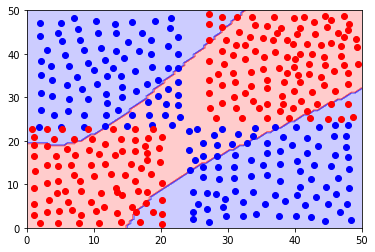

In [164]:

## 2) Now adding a couple of neurons and using a non linear activation function 


my_classifier = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu')

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()


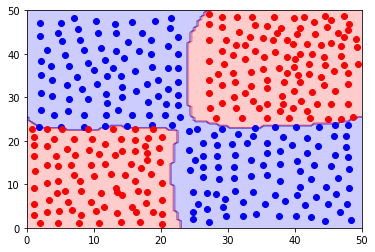

In [149]:
## 3) changing the learning rate


## Try various values for the learning rate between .0001 and 1. What do you observe ?

my_classifier = MLPClassifier(hidden_layer_sizes = (20,20,20), activation = 'relu', learning_rate  = 'constant', learning_rate_init =.001, max_iter=20000)

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()




__2b.__ Keep the dataset from above. try to change the intialization of the training algorithm. Plot the resulting classifier for a couple of different initializations. What do you see?

Do it for a small network first. Then repeat those experiments for larger architectures. I.e. increase the number of neurons and the number of layers. What do you see when you change the initialization?


In [ ]:

# To 
class MLPClassifierOverride(MLPClassifier):
# Overriding _init_coef method
def _init_coef(self, fan_in, fan_out):
    if self.activation == 'logistic':
        init_bound = np.sqrt(2. / (fan_in + fan_out))
    elif self.activation in ('identity', 'tanh', 'relu'):
        init_bound = np.sqrt(6. / (fan_in + fan_out))
    else:
        raise ValueError("Unknown activation function %s" %
                         self.activation)
    coef_init = ### place your initial values for coef_init here

    intercept_init = ### place your initial values for intercept_init here

    return coef_init, intercept_init



## Try various values for the learning rate between .0001 and 1. What do you observe ?

my_classifier = MLPClassifier(hidden_layer_sizes = (20,1000,20), activation = 'relu', learning_rate  = 'constant', learning_rate_init =.001)

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()




#### Exercise 3. 

__3a.__Load the data below. Try to build the best neural network you can for this dataset. Split the data between a training and a test set and evaluate the models you built. What is the best validation error you can get?


<Figure size 432x288 with 0 Axes>

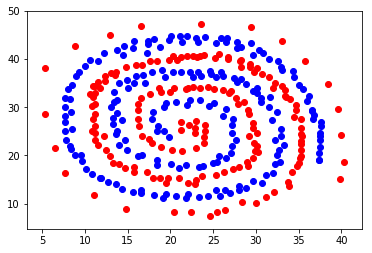

In [7]:

import scipy.io as sio
data1 = sio.loadmat('neural_net_ex2_class1.mat')
data2 = sio.loadmat('neural_net_ex2_class2.mat')

data1 = data1['neural_net_ex2_class1']
data2 = data2['neural_net_ex2_class2']


from sklearn.neural_network import MLPClassifier

# put your code here

import matplotlib.pyplot as plt
import numpy as np

sz1 = np.shape(data1)
sz2 = np.shape(data2)
targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

total_targets = np.hstack((targetsClass1, targetsClass2))
total_data = np.vstack((data1, data2))

from sklearn.neural_network import MLPClassifier

## We first try a simple MLP with Relu activation and without any additional features

my_classifier = MLPClassifier(hidden_layer_sizes = (5,5,5), activation = 'relu', learning_rate  = 'invscaling', learning_rate_init =.001, max_iter=20000, alpha = .0000001)

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
# xx, yy = np.meshgrid(np.linspace(0,50,100),
#                            np.linspace(0,50,100))
# Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)


fig, ax = plt.subplots()
plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()



fig.savefig('spiralRaw1.png', format='png', dpi=600)

In [158]:
print(sz1[0])

193



__3b.__ With the same dataset, add additional features to your model, e.g. $\sin(x), \sin(y)$ or other monomials. Can you improve your classifier ?

In [127]:
# Even when using Neural networks, it might be interesting to add additional features


import scipy.io as sio
data1 = sio.loadmat('neural_net_ex2_class1.mat')
data2 = sio.loadmat('neural_net_ex2_class2.mat')

data1 = data1['neural_net_ex2_class1']
data2 = data2['neural_net_ex2_class2']


from sklearn.neural_network import MLPClassifier

# put your code here

import matplotlib.pyplot as plt
import numpy as np

sz1 = np.shape(data1)
sz2 = np.shape(data2)
targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

total_targets = np.hstack((targetsClass1, targetsClass2))
total_data = np.vstack((data1, data2))

total_data = np.vstack((data1, data2))
total_original_data = total_data



np.shape(total_data)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
total_data = poly.fit_transform(total_data)
total_data = total_data[:,1:]


total_data = np.hstack((total_data,np.sin(total_original_data)) )


from sklearn.neural_network import MLPClassifier

## We first try a simple MLP with Relu activation and without any additional features

my_classifier = MLPClassifier(hidden_layer_sizes = (20,20,20,20), activation = 'tanh', max_iter=2000, batch_size=1000,learning_rate_init=0.01)

my_classifier.fit(total_data, total_targets)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size=1000, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20, 20), learning_rate='constant',
       learning_rate_init=0.01, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

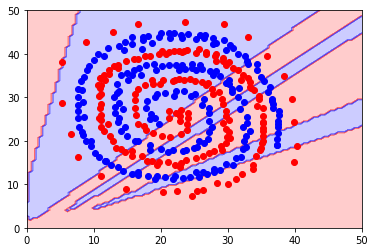

In [128]:



from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))

preprocessed1 = np.array([xx.ravel(), yy.ravel()]).T

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
preprocessed = poly.fit_transform(preprocessed1)
preprocessed = preprocessed[:,1:]
preprocessed = np.hstack((preprocessed,np.sin(preprocessed1)) )


Z = my_classifier.predict(preprocessed)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()